In [286]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
# nltk.download('punkt')
import string
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm


import seaborn as sns

import pydotplus
from IPython.display import Image

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')

from sklearn.metrics import roc_auc_score

def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [287]:
Hotels=pd.read_csv('Data/Hoteltest.csv', encoding = "ISO-8859-1")

In [288]:
Hotels.head(5)

   hotel_code country_code   country_name  location_code location_name  \
0           1          USA  United States          60880     Anchorage   
1           2          USA  United States          28995      Anniston   
2           3          USA  United States          29006        Auburn   
3           4          USA  United States          30524       Fayette   
4           5          USA  United States          30584  Guntersville   

  hotel_type  rooms  bubble_rating  bubble_one  bubble_two  ...   \
0      Hotel  547.0            4.0          14          35  ...    
1      Hotel   60.0            4.0           4           7  ...    
2      B & B    5.0            5.0           1           1  ...    
3      B & B    9.0            4.5           0           0  ...    
4      B & B    4.0            2.5           5           1  ...    

   visitor_country2  visitor_country3  management_response_rate  \
0               UKR               AUS                  0.375919   
1           

In [148]:
Hotels.tail(5)

        hotel_code country_code country_name  location_code location_name  \
366639      366400          CHN        China         297407        Xiamen   
366640      366401          CHN        China         297407        Xiamen   
366641      366402          CHN        China         297407        Xiamen   
366642      366403          CHN        China         297407        Xiamen   
366643      366404          CHN        China         297407        Xiamen   

       hotel_type  rooms  bubble_rating  bubble_one  bubble_two  ...   \
366639      Hotel    NaN            4.0           0           0  ...    
366640      Hotel    NaN            4.0           0           0  ...    
366641      Hotel    NaN            3.5           0           0  ...    
366642      Hotel    NaN            4.0           0           0  ...    
366643      Hotel  113.0            4.0           0           0  ...    

        visitor_country2  visitor_country3  management_response_rate  \
366639               USA  

In [289]:
Hotels.columns

Index(['hotel_code', 'country_code', 'country_name', 'location_code',
       'location_name', 'hotel_type', 'rooms', 'bubble_rating', 'bubble_one',
       'bubble_two', 'bubble_three', 'bubble_four', 'bubble_five',
       'page_position', 'out_of', 'reviews', 'domestic_reviews',
       'international_reviews', 'reviews_per_room', 'visitor_country1',
       'visitor_country2', 'visitor_country3', 'management_response_rate',
       'independent_flag', 'traffic', 'traffic_per_room', 'OTA_region_rate',
       'subscriber', 'hotel', 'BandB'],
      dtype='object')

In [290]:
Hotels.describe()

          hotel_code  location_code          rooms  bubble_rating  \
count  366644.000000   3.666440e+05  335223.000000  344126.000000   
mean   183322.500000   5.234303e+05      51.498062       3.921758   
std    105841.150385   5.432376e+05      95.269292       0.818957   
min         1.000000   2.892300e+04       1.000000       1.000000   
25%     91661.750000   1.878950e+05       8.000000       3.500000   
50%    183322.500000   2.979770e+05      20.000000       4.000000   
75%    274983.250000   6.590670e+05      52.000000       4.500000   
max    366644.000000   4.946280e+06    6836.000000       5.000000   

          bubble_one     bubble_two   bubble_three    bubble_four  \
count  366644.000000  366644.000000  366644.000000  366644.000000   
mean        3.059930       3.301742       7.014199      17.221073   
std        12.272278      11.517430      22.555240      50.082025   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

In [291]:
Hotels.dtypes

hotel_code                    int64
country_code                 object
country_name                 object
location_code                 int64
location_name                object
hotel_type                   object
rooms                       float64
bubble_rating               float64
bubble_one                    int64
bubble_two                    int64
bubble_three                  int64
bubble_four                   int64
bubble_five                   int64
page_position               float64
out_of                      float64
reviews                       int64
domestic_reviews              int64
international_reviews         int64
reviews_per_room            float64
visitor_country1             object
visitor_country2             object
visitor_country3             object
management_response_rate    float64
independent_flag              int64
traffic                     float64
traffic_per_room            float64
OTA_region_rate             float64
subscriber                  

In [292]:
Hotels.describe(include="all")

           hotel_code country_code   country_name  location_code  \
count   366644.000000       366644         366644   3.666440e+05   
unique            NaN          217            217            NaN   
top               NaN          USA  United States            NaN   
freq              NaN        39900          39900            NaN   
mean    183322.500000          NaN            NaN   5.234303e+05   
std     105841.150385          NaN            NaN   5.432376e+05   
min          1.000000          NaN            NaN   2.892300e+04   
25%      91661.750000          NaN            NaN   1.878950e+05   
50%     183322.500000          NaN            NaN   2.979770e+05   
75%     274983.250000          NaN            NaN   6.590670e+05   
max     366644.000000          NaN            NaN   4.946280e+06   

       location_name hotel_type          rooms  bubble_rating     bubble_one  \
count         366644     366644  335223.000000  344126.000000  366644.000000   
unique         49729   

In [293]:
Hotels[['BandB','subscriber']].describe(include="all")

               BandB     subscriber
count  366644.000000  366644.000000
mean        0.326404       0.128012
std         0.468898       0.334104
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         1.000000       0.000000
max         1.000000       1.000000

In [294]:
Hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366644 entries, 0 to 366643
Data columns (total 30 columns):
hotel_code                  366644 non-null int64
country_code                366644 non-null object
country_name                366644 non-null object
location_code               366644 non-null int64
location_name               366644 non-null object
hotel_type                  366644 non-null object
rooms                       335223 non-null float64
bubble_rating               344126 non-null float64
bubble_one                  366644 non-null int64
bubble_two                  366644 non-null int64
bubble_three                366644 non-null int64
bubble_four                 366644 non-null int64
bubble_five                 366644 non-null int64
page_position               366602 non-null float64
out_of                      366602 non-null float64
reviews                     366644 non-null int64
domestic_reviews            366644 non-null int64
international_reviews      

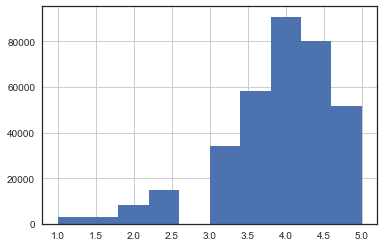

In [295]:
Hotels['bubble_rating'].hist()

In [296]:
import seaborn as sns
sns.set_style("whitegrid")


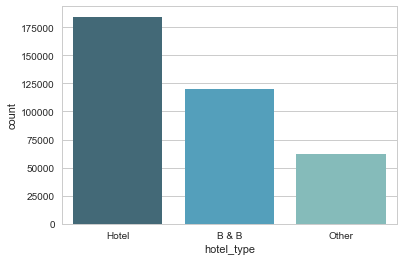

In [297]:
ax = sns.countplot(x="hotel_type", palette="GnBu_d", data=Hotels)

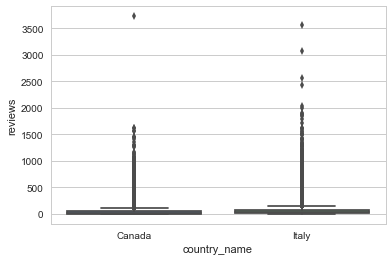

In [298]:
ax = sns.boxplot(x="country_name", y="reviews", data=Hotels, order=["Canada","Italy"])

In [299]:
%matplotlib inline

In [300]:
corr = Hotels.corr()

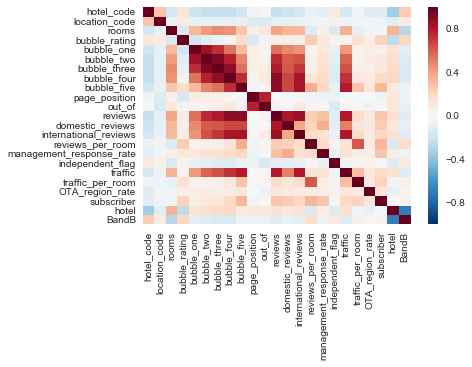

In [301]:
sns.heatmap(corr)

In [302]:
Hotels.dropna()
Hotels.dropna(subset=["country_name"], axis=0, inplace=True) or Hotels.dropna(subset=["country_name"], axis=0)

        hotel_code country_code      country_name  location_code  \
0                1          USA     United States          60880   
1                2          USA     United States          28995   
2                3          USA     United States          29006   
3                4          USA     United States          30524   
4                5          USA     United States          30584   
5                6          USA     United States          30677   
6                7          USA     United States          30709   
7                8          USA     United States          30712   
8                9          USA     United States          30712   
9               10          USA     United States          30781   
10              11          USA     United States          30832   
11              12          USA     United States          60880   
12              13          USA     United States          60880   
13              14          USA     United State

In [305]:
Hotels.dropna(subset=["country_name"], axis=0, inplace=True)

In [306]:
mean=Hotels["rooms"].mean()
print(mean)

51.49806248377946


In [307]:
median=Hotels["rooms"].median()
print(median)

20.0


In [308]:
mode=Hotels["rooms"].mode()
print(mode)

0    3.0
dtype: float64


In [309]:
Hotels.dropna(subset=["country_name"], axis=0, inplace=True)

In [310]:
#Replace missing values with mean
Hotels["rooms"].replace(np.nan,mean)

0         547.000000
1          60.000000
2           5.000000
3           9.000000
4           4.000000
5           3.000000
6           6.000000
7           4.000000
8           4.000000
9           6.000000
10         30.000000
11          5.000000
12          3.000000
13          5.000000
14          5.000000
15          2.000000
16          9.000000
17          2.000000
18         21.000000
19         19.000000
20         83.000000
21          3.000000
22         29.000000
23         11.000000
24         30.000000
25          8.000000
26          8.000000
27          2.000000
28          4.000000
29        153.000000
             ...    
366614     34.000000
366615     51.498062
366616     51.498062
366617     10.000000
366618      4.000000
366619     51.498062
366620      2.000000
366621     51.498062
366622      5.000000
366623      2.000000
366624     51.498062
366625      4.000000
366626     22.000000
366627     15.000000
366628      4.000000
366629     48.000000
366630      3

In [311]:
#Apply Calculations to column
Hotels["rooms"]=5*Hotels["rooms"]

In [312]:
Hotels["rooms"]

0         2735.0
1          300.0
2           25.0
3           45.0
4           20.0
5           15.0
6           30.0
7           20.0
8           20.0
9           30.0
10         150.0
11          25.0
12          15.0
13          25.0
14          25.0
15          10.0
16          45.0
17          10.0
18         105.0
19          95.0
20         415.0
21          15.0
22         145.0
23          55.0
24         150.0
25          40.0
26          40.0
27          10.0
28          20.0
29         765.0
           ...  
366614     170.0
366615       NaN
366616       NaN
366617      50.0
366618      20.0
366619       NaN
366620      10.0
366621       NaN
366622      25.0
366623      10.0
366624       NaN
366625      20.0
366626     110.0
366627      75.0
366628      20.0
366629     240.0
366630      15.0
366631     150.0
366632      55.0
366633      50.0
366634     220.0
366635       NaN
366636       NaN
366637       NaN
366638      15.0
366639       NaN
366640       NaN
366641       N

In [313]:
#rename column
Hotels.rename(columns={"rooms":"rooms_times_5"}, inplace=True)

In [314]:
Hotels.head(5)

   hotel_code country_code   country_name  location_code location_name  \
0           1          USA  United States          60880     Anchorage   
1           2          USA  United States          28995      Anniston   
2           3          USA  United States          29006        Auburn   
3           4          USA  United States          30524       Fayette   
4           5          USA  United States          30584  Guntersville   

  hotel_type  rooms_times_5  bubble_rating  bubble_one  bubble_two  ...   \
0      Hotel         2735.0            4.0          14          35  ...    
1      Hotel          300.0            4.0           4           7  ...    
2      B & B           25.0            5.0           1           1  ...    
3      B & B           45.0            4.5           0           0  ...    
4      B & B           20.0            2.5           5           1  ...    

   visitor_country2  visitor_country3  management_response_rate  \
0               UKR            

In [315]:
#Convert datatype as necessary
Hotels["rooms"]=Hotels["rooms"].astype("int")

KeyError: 'rooms'

In [316]:
#Standardize the dats
Hotels["traffic"]=(Hotels["traffic"]-Hotels["traffic"].mean())/Hotels["traffic"].std()

In [317]:
Hotels["traffic"].head(5)

0    2.070689
1    0.002751
2   -0.096115
3   -0.231584
4   -0.201377
Name: traffic, dtype: float64

In [318]:
Hotels.describe()

          hotel_code  location_code  rooms_times_5  bubble_rating  \
count  366644.000000   3.666440e+05  335223.000000  344126.000000   
mean   183322.500000   5.234303e+05     257.490312       3.921758   
std    105841.150385   5.432376e+05     476.346461       0.818957   
min         1.000000   2.892300e+04       5.000000       1.000000   
25%     91661.750000   1.878950e+05      40.000000       3.500000   
50%    183322.500000   2.979770e+05     100.000000       4.000000   
75%    274983.250000   6.590670e+05     260.000000       4.500000   
max    366644.000000   4.946280e+06   34180.000000       5.000000   

          bubble_one     bubble_two   bubble_three    bubble_four  \
count  366644.000000  366644.000000  366644.000000  366644.000000   
mean        3.059930       3.301742       7.014199      17.221073   
std        12.272278      11.517430      22.555240      50.082025   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

In [319]:
Hotels.rename(columns={"rooms":"rooms_times_5"}, inplace=True)

In [320]:
Hotels["rooms"]=Hotels["rooms_times_5"]/5

In [321]:
Hotels["rooms"].head(5)

0    547.0
1     60.0
2      5.0
3      9.0
4      4.0
Name: rooms, dtype: float64

In [322]:
binwidth=int((max(Hotels["rooms"])-min(Hotels["rooms"]))/4)

In [323]:
binwidth

1708

In [324]:
Hotels.describe()

          hotel_code  location_code  rooms_times_5  bubble_rating  \
count  366644.000000   3.666440e+05  335223.000000  344126.000000   
mean   183322.500000   5.234303e+05     257.490312       3.921758   
std    105841.150385   5.432376e+05     476.346461       0.818957   
min         1.000000   2.892300e+04       5.000000       1.000000   
25%     91661.750000   1.878950e+05      40.000000       3.500000   
50%    183322.500000   2.979770e+05     100.000000       4.000000   
75%    274983.250000   6.590670e+05     260.000000       4.500000   
max    366644.000000   4.946280e+06   34180.000000       5.000000   

          bubble_one     bubble_two   bubble_three    bubble_four  \
count  366644.000000  366644.000000  366644.000000  366644.000000   
mean        3.059930       3.301742       7.014199      17.221073   
std        12.272278      11.517430      22.555240      50.082025   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

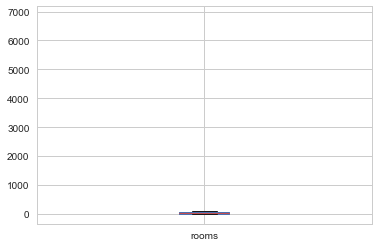

In [325]:
Hotels.boxplot(column=['rooms'])

In [326]:
bins=range(min(Hotels["rooms"]),max(Hotels["rooms"]), binwidth)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [327]:
Hotels["rooms"].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [328]:
Hotels["B & B,"Hotels","Other"]=pd.get_dummies(Hotels["hotel_type"])

SyntaxError: invalid syntax (<ipython-input-328-423404de2b1a>, line 1)

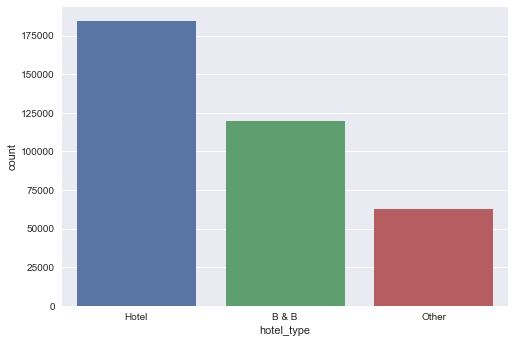

In [329]:
Values=Hotels["hotel_type"].value_counts()
sns.set(style="darkgrid")
ax = sns.countplot(x="hotel_type", data=Hotels)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022DB5ED39B0>], dtype=object)

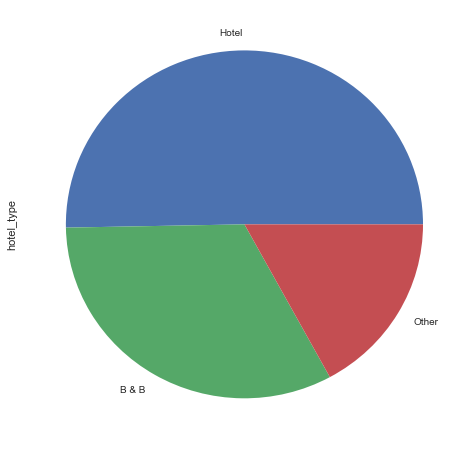

In [330]:
Values.plot(kind='pie', subplots=True, figsize=(8, 8))

In [331]:
Values

Hotel    184421
B & B    119674
Other     62549
Name: hotel_type, dtype: int64

In [332]:
Hotels["rooms"]=Hotels["rooms"].astype(float, copy=True)

In [333]:
missing_data = Hotels.isnull()

In [334]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

hotel_code
False    366644
Name: hotel_code, dtype: int64

country_code
False    366644
Name: country_code, dtype: int64

country_name
False    366644
Name: country_name, dtype: int64

location_code
False    366644
Name: location_code, dtype: int64

location_name
False    366644
Name: location_name, dtype: int64

hotel_type
False    366644
Name: hotel_type, dtype: int64

rooms_times_5
False    335223
True      31421
Name: rooms_times_5, dtype: int64

bubble_rating
False    344126
True      22518
Name: bubble_rating, dtype: int64

bubble_one
False    366644
Name: bubble_one, dtype: int64

bubble_two
False    366644
Name: bubble_two, dtype: int64

bubble_three
False    366644
Name: bubble_three, dtype: int64

bubble_four
False    366644
Name: bubble_four, dtype: int64

bubble_five
False    366644
Name: bubble_five, dtype: int64

page_position
False    366602
True         42
Name: page_position, dtype: int64

out_of
False    366602
True         42
Name: out_of, dtype: int64

reviews
False

In [335]:
Hotels["new_rooms"] = Hotels["rooms"].dropna()

In [336]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

hotel_code
False    366644
Name: hotel_code, dtype: int64

country_code
False    366644
Name: country_code, dtype: int64

country_name
False    366644
Name: country_name, dtype: int64

location_code
False    366644
Name: location_code, dtype: int64

location_name
False    366644
Name: location_name, dtype: int64

hotel_type
False    366644
Name: hotel_type, dtype: int64

rooms_times_5
False    335223
True      31421
Name: rooms_times_5, dtype: int64

bubble_rating
False    344126
True      22518
Name: bubble_rating, dtype: int64

bubble_one
False    366644
Name: bubble_one, dtype: int64

bubble_two
False    366644
Name: bubble_two, dtype: int64

bubble_three
False    366644
Name: bubble_three, dtype: int64

bubble_four
False    366644
Name: bubble_four, dtype: int64

bubble_five
False    366644
Name: bubble_five, dtype: int64

page_position
False    366602
True         42
Name: page_position, dtype: int64

out_of
False    366602
True         42
Name: out_of, dtype: int64

reviews
False

In [337]:
binwidth = (max(Hotels["new_rooms"])-min(Hotels["new_rooms"]))/4

In [338]:
bins= ([1,8,20,52,6836])

In [339]:

bins

[1, 8, 20, 52, 6836]

In [340]:
group_names = ['Low', 'Medium', 'High', 'Very_High']

In [341]:
Hotels['new_rooms-binned'] = pd.cut(Hotels["new_rooms"], bins, labels=group_names,include_lowest=True )
Hotels[['new_rooms','new_rooms-binned']]

        new_rooms new_rooms-binned
0           547.0        Very_High
1            60.0        Very_High
2             5.0              Low
3             9.0           Medium
4             4.0              Low
5             3.0              Low
6             6.0              Low
7             4.0              Low
8             4.0              Low
9             6.0              Low
10           30.0             High
11            5.0              Low
12            3.0              Low
13            5.0              Low
14            5.0              Low
15            2.0              Low
16            9.0           Medium
17            2.0              Low
18           21.0             High
19           19.0           Medium
20           83.0        Very_High
21            3.0              Low
22           29.0             High
23           11.0           Medium
24           30.0             High
25            8.0              Low
26            8.0              Low
27            2.0   

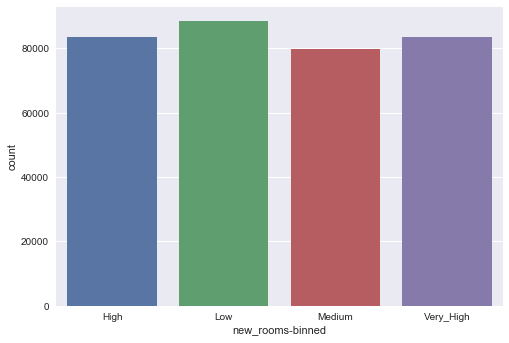

In [342]:
Values=Hotels["new_rooms-binned"].value_counts()
sns.set(style="darkgrid")
ax = sns.countplot(x="new_rooms-binned", data=Hotels)

In [343]:
dummy_variable_1 = pd.get_dummies(Hotels["hotel_type"])
dummy_variable_1.head()

   B & B  Hotel  Other
0      0      1      0
1      0      1      0
2      1      0      0
3      1      0      0
4      1      0      0

In [344]:
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel', }, inplace=True)
dummy_variable_1.head()

   B & B  Hotel  Other
0      0      1      0
1      0      1      0
2      1      0      0
3      1      0      0
4      1      0      0

In [345]:
Hotels = pd.concat([Hotels, dummy_variable_1], axis=1)

In [346]:
Hotels.head(5)

   hotel_code country_code   country_name  location_code location_name  \
0           1          USA  United States          60880     Anchorage   
1           2          USA  United States          28995      Anniston   
2           3          USA  United States          29006        Auburn   
3           4          USA  United States          30524       Fayette   
4           5          USA  United States          30584  Guntersville   

  hotel_type  rooms_times_5  bubble_rating  bubble_one  bubble_two  ...   \
0      Hotel         2735.0            4.0          14          35  ...    
1      Hotel          300.0            4.0           4           7  ...    
2      B & B           25.0            5.0           1           1  ...    
3      B & B           45.0            4.5           0           0  ...    
4      B & B           20.0            2.5           5           1  ...    

   OTA_region_rate  subscriber  hotel  BandB  rooms  new_rooms  \
0       196.643125           1  

In [347]:
#rename columns
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
dummy_variable_2.head()

NameError: name 'dummy_variable_2' is not defined

In [219]:
#drop columns
df.drop("fuel-type", axis = 1, inplace=True)

NameError: name 'df' is not defined

In [348]:
Hotels.to_csv('Hotels_df.csv')

PermissionError: [Errno 13] Permission denied: 'Hotels_df.csv'

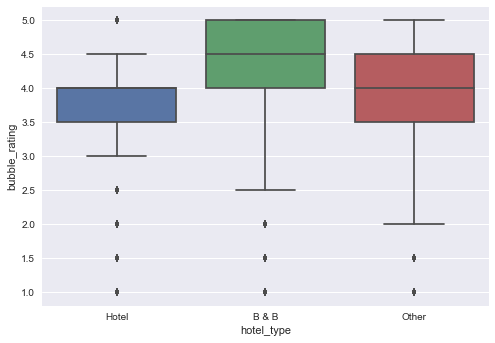

In [349]:
sns.boxplot(x="hotel_type", y="bubble_rating", data=Hotels)

In [350]:
x=Hotels["rooms"]
y=Hotels["reviews"]

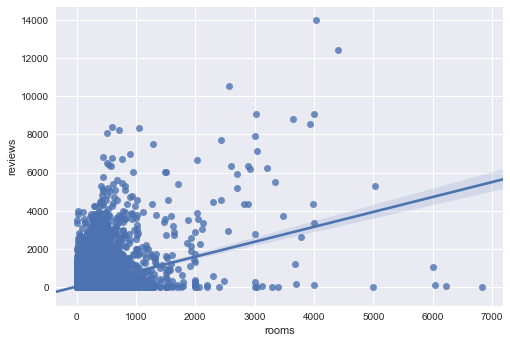

In [351]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x, y, data=Hotels)

In [352]:
Hotels.corr()

                          hotel_code  location_code  rooms_times_5  \
hotel_code                  1.000000       0.284782      -0.175151   
location_code               0.284782       1.000000      -0.069725   
rooms_times_5              -0.175151      -0.069725       1.000000   
bubble_rating               0.113364       0.088449      -0.153616   
bubble_one                 -0.199782      -0.080759       0.324180   
bubble_two                 -0.233599      -0.083246       0.422788   
bubble_three               -0.235351      -0.087458       0.470391   
bubble_four                -0.236617      -0.092332       0.447734   
bubble_five                -0.187135      -0.074947       0.268604   
page_position              -0.041103      -0.133721       0.056442   
out_of                     -0.021128      -0.143670       0.120206   
reviews                    -0.227422      -0.089012       0.393633   
domestic_reviews           -0.207706      -0.086892       0.330591   
international_review

In [353]:
Hotels[['rooms','reviews','bubble_rating']].corr()

                  rooms   reviews  bubble_rating
rooms          1.000000  0.393633      -0.153616
reviews        0.393633  1.000000       0.073791
bubble_rating -0.153616  0.073791       1.000000

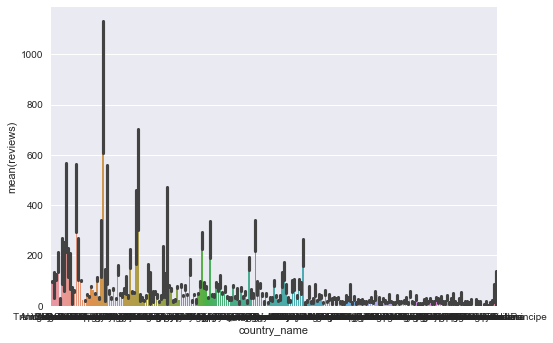

In [355]:
ax = sns.barplot(x="country_name", y="reviews", data=Hotels)

In [356]:
Hotels['hotel_type'].value_counts()

Hotel    184421
B & B    119674
Other     62549
Name: hotel_type, dtype: int64

In [357]:
Hotels['hotel_type'].value_counts().to_frame()

       hotel_type
Hotel      184421
B & B      119674
Other       62549

In [358]:
Hotels['hotel_type'].unique()

array(['Hotel', 'B & B', 'Other'], dtype=object)

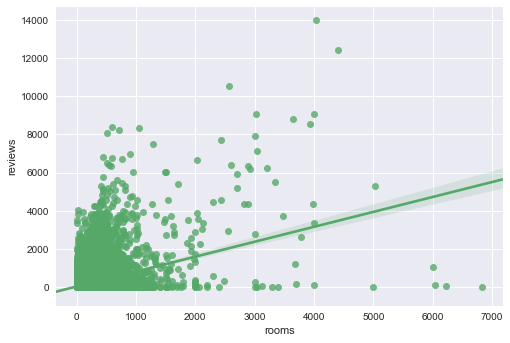

In [359]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x, y, data=Hotels, color="g")

In [360]:
Hotels_group_one=Hotels[['country_name','hotel_type','bubble_rating']]

In [361]:
Hotels_group_one=Hotels_group_one.groupby(['country_name'],as_index= False).mean()
Hotels_group_one

               country_name  bubble_rating
0               Afghanistan       3.916667
1                   Albania       3.894515
2                   Algeria       3.215278
3            American Samoa       4.142857
4                   Andorra       3.586879
5                    Angola       3.451220
6                  Anguilla       4.500000
7       Antigua and Barbuda       4.288136
8                 Argentina       3.836476
9                   Armenia       3.983333
10                    Aruba       4.260870
11                Australia       3.936746
12                  Austria       4.133057
13               Azerbaijan       3.612500
14                  Bahamas       4.388489
15                  Bahrain       3.301136
16               Bangladesh       3.554545
17                 Barbados       4.291262
18                  Belarus       3.585366
19                  Belgium       3.900192
20                   Belize       4.300236
21                    Benin       3.672414
22         

In [362]:
Hotels_group_one.sort_values(by=['bubble_rating'], ascending=False)

                       country_name  bubble_rating
128                      Montserrat       5.000000
85                            Haiti       4.750000
37                   Cayman Islands       4.718750
159                    Saint Helena       4.666667
55                         Dominica       4.500000
6                          Anguilla       4.500000
199                Turks and Caicos       4.487805
65                 Falkland Islands       4.444444
44                     Cook Islands       4.402542
14                          Bahamas       4.388489
179                       St. Lucia       4.379032
28           British Virgin Islands       4.361111
20                           Belize       4.300236
17                         Barbados       4.291262
7               Antigua and Barbuda       4.288136
174                    South Africa       4.281950
22                          Bermuda       4.274194
178             St. Kitts and Nevis       4.272727
201             U.S. Virgin Isl

In [363]:
Hotels_gptest=Hotels[['country_name','hotel_type','bubble_rating']]
grouped_test1=Hotels_gptest.groupby(['country_name','hotel_type'],as_index= False).mean()
grouped_test1

            country_name hotel_type  bubble_rating
0            Afghanistan      B & B       3.857143
1            Afghanistan      Hotel       4.000000
2                Albania      B & B       4.000000
3                Albania      Hotel       3.833333
4                Albania      Other       4.000000
5                Algeria      B & B       3.550000
6                Algeria      Hotel       2.911111
7                Algeria      Other       4.214286
8         American Samoa      B & B       3.500000
9         American Samoa      Hotel       4.000000
10        American Samoa      Other       4.750000
11               Andorra      B & B       3.418605
12               Andorra      Hotel       3.546703
13               Andorra      Other       3.842105
14                Angola      B & B       3.500000
15                Angola      Hotel       3.280000
16                Angola      Other       4.083333
17              Anguilla      B & B       3.833333
18              Anguilla      H

In [364]:
grouped_pivot=grouped_test1.pivot(index='country_name',columns='hotel_type')
grouped_pivot

                       bubble_rating                    
hotel_type                     B & B     Hotel     Other
country_name                                            
Afghanistan                 3.857143  4.000000       NaN
Albania                     4.000000  3.833333  4.000000
Algeria                     3.550000  2.911111  4.214286
American Samoa              3.500000  4.000000  4.750000
Andorra                     3.418605  3.546703  3.842105
Angola                      3.500000  3.280000  4.083333
Anguilla                    3.833333  4.500000  4.722222
Antigua and Barbuda         3.916667  4.242857  4.500000
Argentina                   3.938534  3.733042  3.922306
Armenia                     4.125000  3.710526  4.500000
Aruba                       4.600000  4.080000  4.437500
Australia                   4.205575  3.695255  3.986716
Austria                     4.192611  4.052872  4.255452
Azerbaijan                  3.703125  3.553191  3.500000
Bahamas                     4.4

In [236]:
grouped_pivot=grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

                       bubble_rating                    
hotel_type                     B & B     Hotel     Other
country_name                                            
Afghanistan                 3.857143  4.000000  0.000000
Albania                     4.000000  3.833333  4.000000
Algeria                     3.550000  2.911111  4.214286
American Samoa              3.500000  4.000000  4.750000
Andorra                     3.418605  3.546703  3.842105
Angola                      3.500000  3.280000  4.083333
Anguilla                    3.833333  4.500000  4.722222
Antigua and Barbuda         3.916667  4.242857  4.500000
Argentina                   3.938534  3.733042  3.922306
Armenia                     4.125000  3.710526  4.500000
Aruba                       4.600000  4.080000  4.437500
Australia                   4.205575  3.695255  3.986716
Austria                     4.192611  4.052872  4.255452
Azerbaijan                  3.703125  3.553191  3.500000
Bahamas                     4.4

In [365]:
import matplotlib.pyplot as plt
% matplotlib inline 

C:\Users\sbean\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


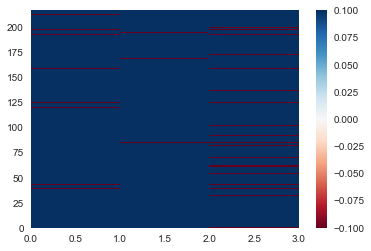

In [366]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

C:\Users\sbean\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


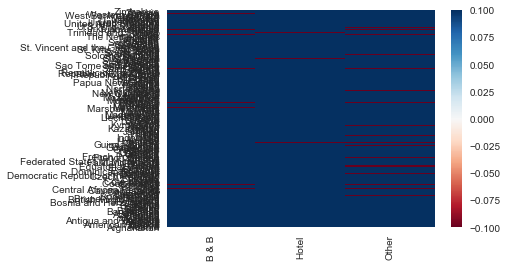

In [367]:
fig, ax=plt.subplots()
im=ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels=grouped_pivot.columns.levels[1]
col_labels=grouped_pivot.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [371]:
from scipy import stats

In [372]:
pearson_coef, p_value = stats.pearsonr(Hotels['rooms'], Hotels['bubble_rating'])

a=pearson_coef, p_value = stats.pearsonr(Hotels['rooms'], Hotels['bubble_rating'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  
a

The Pearson Correlation Coefficient is nan  with a P-value of P = 1.0


C:\Users\sbean\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


(nan, 1.0)

In [373]:
pearson_coef, p_value = stats.pearsonr(Hotels['rooms'], Hotels['BandB'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is nan  with a P-value of P = 1.0


C:\Users\sbean\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


In [376]:
grouped_test2=Hotels[['hotel_type','reviews']].groupby(['hotel_type'])
grouped_test2.head(2)

   hotel_type  reviews
0       Hotel     1082
1       Hotel      101
2       B & B      113
3       B & B        4
41      Other      148
63      Other       50

In [377]:
grouped_test2.get_group('Hotel')['reviews']

0         1082
1          101
6            0
24          46
29         667
36          51
37          57
38         151
43          42
49          20
51          14
52          18
53         108
55         105
64          17
65          17
66           8
67           6
69          31
70          28
72          23
73           6
75           2
78           5
83           9
88          70
91         284
93           5
95           8
98          40
          ... 
366535       0
366543       1
366545      42
366550       5
366555      55
366557      94
366576       1
366577      25
366588       9
366589       0
366598       8
366601      81
366607      12
366610      12
366611       3
366614      13
366615       4
366619      55
366621       7
366629      53
366632      24
366634       2
366635       1
366636       2
366637       0
366639       1
366640       1
366641       3
366642       1
366643       2
Name: reviews, Length: 184421, dtype: int64

In [378]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Hotel')['reviews'], grouped_test2.get_group('B & B')['reviews'], grouped_test2.get_group('Other')['reviews'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 4943.73213922 , P = 0.0


In [379]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Hotel')['reviews'], grouped_test2.get_group('B & B')['reviews'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 6417.67265837 , P = 0.0


In [380]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Hotel')['reviews'], grouped_test2.get_group('Other')['reviews'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 3765.82497023 , P = 0.0


In [381]:
from sklearn.linear_model import LinearRegression

In [382]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [387]:
X = Hotels[['rooms']]
Y = Hotels[['reviews']]

In [388]:
lm.fit(X,Y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [389]:
Yhat=lm.predict(X)
Yhat[0:5]   

Yhat30=lm.predict(30)
Yhat30

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [390]:
Yhat547=lm.predict(547)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [391]:
Yhat547

NameError: name 'Yhat547' is not defined

In [392]:
lm.intercept_

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [393]:
lm.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [394]:
Z = Hotels[['rooms', 'traffic', 'bubble_rating']]
Z

        rooms   traffic  bubble_rating
0       547.0  2.070689            4.0
1        60.0  0.002751            4.0
2         5.0 -0.096115            5.0
3         9.0 -0.231584            4.5
4         4.0 -0.201377            2.5
5         3.0 -0.235437            NaN
6         6.0 -0.251696            NaN
7         4.0 -0.098157            5.0
8         4.0 -0.021369            5.0
9         6.0 -0.112182            4.5
10       30.0 -0.229157            NaN
11        5.0 -0.254355            1.0
12        3.0 -0.225959            4.0
13        5.0 -0.240060            5.0
14        5.0 -0.259209            NaN
15        2.0 -0.256821            NaN
16        9.0 -0.079895            4.5
17        2.0 -0.258092            NaN
18       21.0 -0.242372            5.0
19       19.0 -0.004146            4.0
20       83.0  0.193393            3.0
21        3.0 -0.248652            NaN
22       29.0 -0.250540            NaN
23       11.0 -0.194403            2.5
24       30.0 -0.049302  

In [395]:
lm.fit(Z, Hotels['reviews'])


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [396]:
lm.intercept_

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [397]:
lm.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

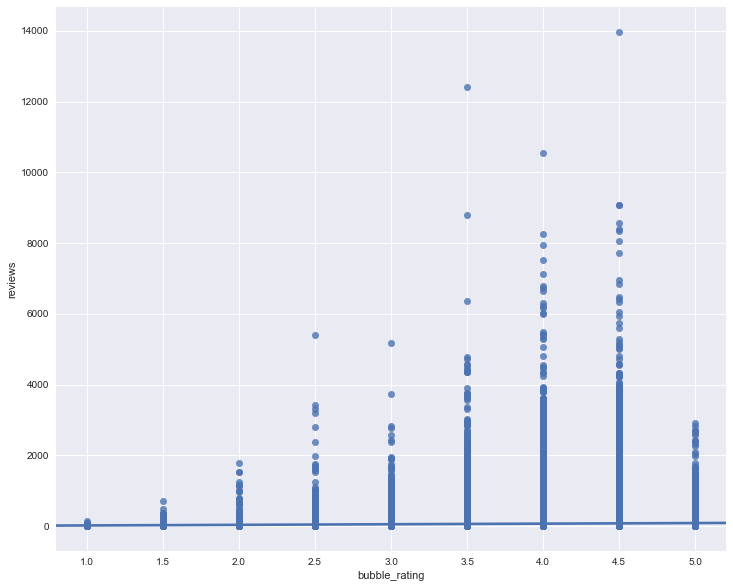

In [398]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="bubble_rating", y="reviews", data=Hotels)

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="rooms", y="reviews", data=Hotels)

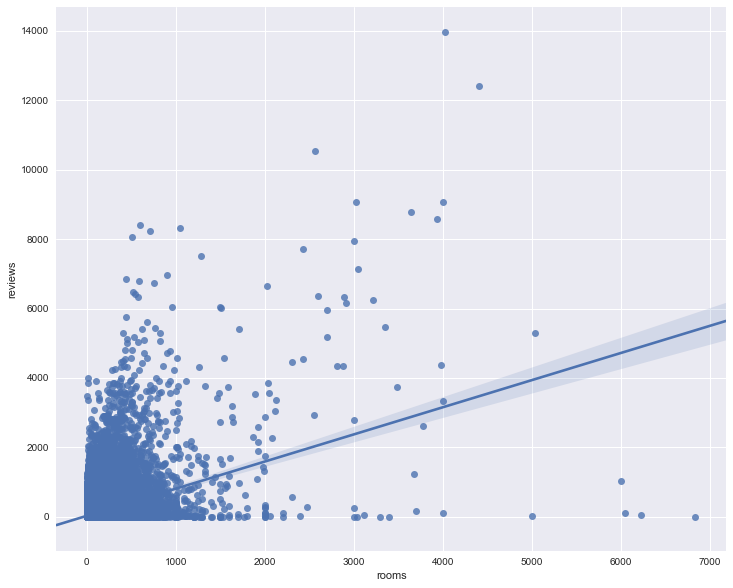

In [399]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="rooms", y="reviews", data=Hotels)

In [400]:
Hotels[["bubble_rating","rooms","reviews"]].corr()

               bubble_rating     rooms   reviews
bubble_rating       1.000000 -0.153616  0.073791
rooms              -0.153616  1.000000  0.393633
reviews             0.073791  0.393633  1.000000

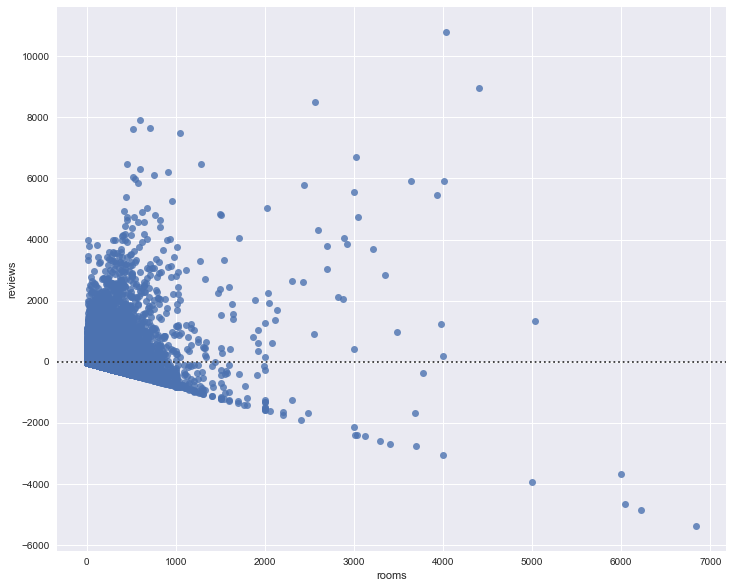

In [401]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(Hotels['rooms'], Hotels['reviews'])
plt.show()

In [402]:
Y_hat = lm.predict(Z)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

NameError: name 'Yhat' is not defined

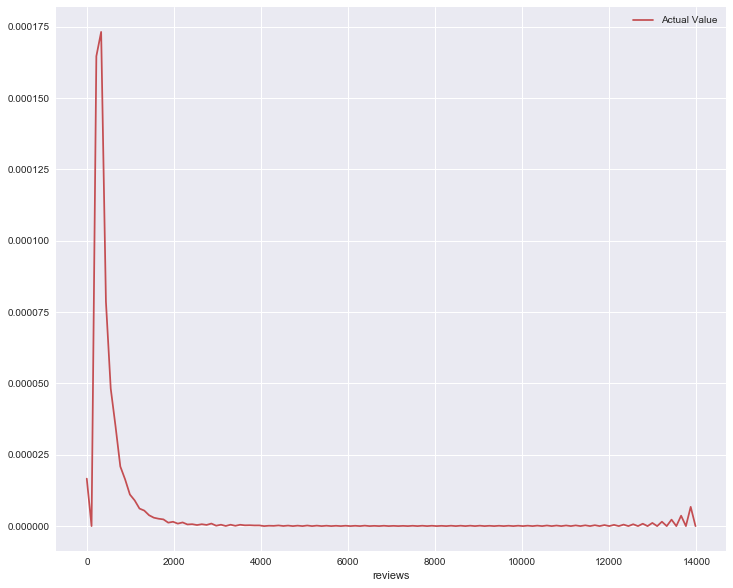

In [403]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(Hotels['reviews'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for reviews')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [404]:
def PlotPolly(model,independent_variable,dependent_variabble, Name):
    x_new = np.linspace(0, 2.5, 5)
    y_new = model(x_new)

    plt.plot(independent_variable,dependent_variabble,'.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_axis_bgcolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
    
print("done")

done


In [405]:
x = Hotels['bubble_rating']
y = Hotels['reviews']
print("done")

done


In [108]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

ValueError: On entry to DGELSD parameter number 4 had an illegal value

In [406]:
PlotPolly(p,x,y, 'bubble_rating')

NameError: name 'p' is not defined

In [407]:
np.polyfit(x, y, 3)

ValueError: On entry to DGELSD parameter number 4 had an illegal value

In [408]:
from sklearn.preprocessing import PolynomialFeatures

In [410]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [411]:
Z_pr=pr.fit_transform(Z)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [412]:
Z.shape

(366644, 3)

In [413]:
Z_pr.shape

NameError: name 'Z_pr' is not defined

In [414]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [415]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [416]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [418]:
pipe.fit(Z,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [419]:
ypipe=pipe.predict(Z)
ypipe[0:4]

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [121]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
lm.score(X, Y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [420]:
Yhat=lm.predict(X)
Yhat[0:4]

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [421]:
from sklearn.metrics import mean_squared_error

In [422]:
#mean_squared_error(Y_true, Y_predict)
mean_squared_error(Hotels['reviews'], Yhat)

NameError: name 'Yhat' is not defined

In [423]:
# fit the model 
lm.fit(Z, Hotels['reviews'])
# Find the R^2
lm.score(Z, Hotels['reviews'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [424]:
Y_predict_multifit = lm.predict(Z)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [425]:
mean_squared_error(Hotels['reviews'], Y_predict_multifit)

NameError: name 'Y_predict_multifit' is not defined

In [427]:
from sklearn.metrics import r2_score

In [428]:
r_squared = r2_score(y, p(x))
r_squared

NameError: name 'p' is not defined

In [429]:
mean_squared_error(Hotels['reviews'], p(x))

NameError: name 'p' is not defined

lm.predict(30)

In [430]:
new_input=np.arange(1,100,1).reshape(-1,1)

In [431]:
lm.fit(X, Y)
lm

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [432]:
yhat=lm.predict(new_input)
yhat[0:5]

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [433]:
yhat


NameError: name 'yhat' is not defined

In [434]:
plt.plot(new_input,yhat)
plt.show()

NameError: name 'yhat' is not defined

In [435]:
Hotels=Hotels._get_numeric_data()
Hotels

        hotel_code  location_code  rooms_times_5  bubble_rating  bubble_one  \
0                1          60880         2735.0            4.0          14   
1                2          28995          300.0            4.0           4   
2                3          29006           25.0            5.0           1   
3                4          30524           45.0            4.5           0   
4                5          30584           20.0            2.5           5   
5                6          30677           15.0            NaN           0   
6                7          30709           30.0            NaN           0   
7                8          30712           20.0            5.0           0   
8                9          30712           20.0            5.0           1   
9               10          30781           30.0            4.5           2   
10              11          30832          150.0            NaN           0   
11              12          60880           25.0    

In [436]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
print("done")

done


C:\Users\sbean\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [437]:
def DistributionPlot(RedFunction,BlueFunction,RedName,BlueName,Title ):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [438]:
def PollyPlot(xtrain,xtest,y_train,y_test,lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(),xtest.values.max()])

    xmin=min([xtrain.values.min(),xtest.values.min()])

    x=np.arange(xmin,xmax,0.1)


    plt.plot(xtrain,y_train,'ro',label='Training Data')
    plt.plot(xtest,y_test,'go',label='Test Data')
    plt.plot(x,lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),label='Predicted Function')
    plt.ylim([-10000,60000])
    plt.ylabel('Price')
    plt.legend()

In [439]:
y_data=Hotels['reviews']

In [440]:
x_data=Hotels.drop('reviews',axis=1)

In [441]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 54997
number of training samples: 311647


In [442]:
from sklearn.linear_model import LinearRegression

In [443]:
lre=LinearRegression()

In [444]:
lre.fit(x_train[['bubble_rating']],y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [445]:
lre.score(x_test[['bubble_rating']],y_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [446]:
lre.score(x_train[['bubble_rating']],y_train)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [447]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

lre1=LinearRegression()

lre1.fit(x_train[['bubble_rating']],y_train)
lre1.score(x_train[['bubble_rating']],y_train)

number of test samples : 36665
number of training samples: 329979


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [448]:
from sklearn.model_selection import cross_val_score
print("done")

done


In [449]:
Rcross=cross_val_score(lre,x_data[['bubble_rating']], y_data,cv=4)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [450]:
Rcross

NameError: name 'Rcross' is not defined

In [451]:
print("The mean of the folds are", Rcross.mean(),"and the standard deviation is" ,Rcross.std())

NameError: name 'Rcross' is not defined

In [452]:
-1*cross_val_score(lre,x_data[['bubble_rating']], y_data,cv=4,scoring='neg_mean_squared_error')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [453]:
Rcross1=cross_val_score(lre,x_data[['rooms']], y_data,cv=2)

print("The mean of the folds are", Rcross1.mean(),"and the standard deviation is" ,Rcross1.std())

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [454]:
from sklearn.model_selection import cross_val_predict

In [455]:
yhat=cross_val_predict(lre,x_data[['rooms']], y_data,cv=4)
yhat[0:5]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').